In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png
from bokeh.io.export import get_screenshot_as_png

In [3]:
tweets = pd.read_csv('../TP1-Organizacion-de-Datos/csv/train.csv')

In [4]:
tweets.sample(n = 5)

,id,keyword,location,text,target
2700,3874,detonation,NaN,Ignition Knock (Detonation) Sensor-Senso BECK/...,0
2054,2946,danger,Uruguay / Westeros / Gallifrey,I am not in danger Skyler. I AM THE DANGER.,0
395,570,arson,"Eldoret, kenya",#Kisii Police in Kisii hunt for students over ...,1
4262,6056,heat%20wave,NaN,It's a heat wave. #Squad #RevItUp #PizzaRev ht...,1
4878,6946,massacre,NaN,@Cameron_WATE\n Parents of Colorado theater sh...,1


In [5]:
ciudades = pd.read_csv('../TP1-Organizacion-de-Datos/csv/worldcities.csv')

In [6]:
ciudades.sample(n = 5)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
1513,Semey,Semey,50.4350,80.2750,Kazakhstan,KZ,KAZ,Shyghys Qazaqstan,NaN,311353.0,1398405657
7200,Hoover,Hoover,33.3754,-86.8065,United States,US,USA,Alabama,NaN,84920.0,1840014795
699,Okayama,Okayama,34.6720,133.9171,Japan,JP,JPN,Okayama,admin,866092.0,1392954750
1420,Kawagoe,Kawagoe,35.9177,139.4911,Japan,JP,JPN,Saitama,NaN,337931.0,1392825080
10792,Lívingston,Livingston,15.8307,-88.7562,Guatemala,GT,GTM,Izabal,minor,14350.0,1320970605


In [7]:
tweets['location'].isnull().sum()

2533

In [8]:
tweets['location'].isnull().mean()

0.33272034677525286

In [9]:
location_list = tweets['location'].tolist()

In [10]:
ciudades_ocurr = tweets['location'].value_counts()

In [11]:
ciudades_ocurr

USA                             104
New York                         71
United States                    50
London                           45
Canada                           29
Nigeria                          28
UK                               27
Los Angeles, CA                  26
India                            24
Mumbai                           22
Washington, DC                   21
Kenya                            20
Worldwide                        19
Australia                        18
Chicago, IL                      18
California                       17
Everywhere                       15
California, USA                  15
New York, NY                     15
San Francisco                    14
United Kingdom                   14
Florida                          14
Los Angeles                      13
Washington, D.C.                 13
Indonesia                        13
Toronto                          12
NYC                              12
Ireland                     

In [12]:
ciudades_list = ciudades['city_ascii']
ciudades_list = pd.DataFrame(ciudades_list)

In [13]:
ciudades_list['ocurrencia'] = 0

In [14]:
ciudades_list

,city_ascii,ocurrencia
0,Tokyo,0
1,New York,0
2,Mexico City,0
3,Mumbai,0
4,Sao Paulo,0
5,Delhi,0
6,Shanghai,0
7,Kolkata,0
8,Los Angeles,0
9,Dhaka,0


In [15]:
ciudades_list.shape

(15493, 2)

In [16]:
ciudades_list['city_ascii'].count()

15493

In [17]:
ciudades_list['veracidad'] = 0
ciudades_list['cant_verdaderos'] = 0

In [18]:
ciudades_list['veracidad'] = ciudades_list['veracidad'].astype(float)

In [19]:
ciudades_list.dtypes

city_ascii          object
ocurrencia           int64
veracidad          float64
cant_verdaderos      int64
dtype: object

In [20]:
tienenLaCiudad = pd.DataFrame(columns=('tweetDeLaCiudad', 'V/F'))
tienenLaCiudad['V/F'] = tweets['target']

Comparo cada ciudad del mundo con los tweets y busco si el nombre de la ciudad esta incluido en el campo "Location" de cada Tweet

In [21]:
#CUIDADO AL EJECUTAR ESTO xD
for x in range(ciudades_list['city_ascii'].count()):
    ciudad = ciudades_list.loc[x, 'city_ascii']
    if (len(ciudad) > 4):
        tienenLaCiudad['tweetDeLaCiudad'] = tweets.loc[:, 'location'].str.contains(ciudad, regex = False)
    else:
        tienenLaCiudad['tweetDeLaCiudad'] = (tweets.loc[:, 'location'] == ciudad)
        
    cant_tweets = tienenLaCiudad[tienenLaCiudad['tweetDeLaCiudad'] == True]['tweetDeLaCiudad'].count()
    verdaderos = tienenLaCiudad[(tienenLaCiudad['V/F'] == 1) & (tienenLaCiudad['tweetDeLaCiudad'] == True)]['V/F'].count()
    
    ciudades_list.loc[x, 'cant_verdaderos'] = verdaderos
    ciudades_list.loc[x, 'ocurrencia'] = cant_tweets
    if (cant_tweets != 0):
        ciudades_list.loc[x, 'veracidad'] = float(verdaderos)/float(cant_tweets)

In [22]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos
0,Tokyo,8,0.500000,4
1,New York,131,0.320611,42
2,Mexico City,1,0.000000,0
3,Mumbai,31,0.838710,26
4,Sao Paulo,2,0.500000,1
5,Delhi,10,0.600000,6
6,Shanghai,1,0.000000,0
7,Kolkata,3,0.333333,1
8,Los Angeles,53,0.358491,19
9,Dhaka,2,1.000000,2


In [23]:
Ciudades_Mas_10_Tweets = (ciudades_list.loc[:,'ocurrencia'] > 10)

In [24]:
Top_populares = ciudades_list.loc[Ciudades_Mas_10_Tweets]

In [25]:
Top_populares = Top_populares.sort_values('ocurrencia', ascending = False)

In [26]:
Top_populares = Top_populares.drop_duplicates(['city_ascii'])

In [27]:
Top_populares

,city_ascii,ocurrencia,veracidad,cant_verdaderos
1,New York,131,0.320611,42
1388,London,108,0.342593,37
13458,California,77,0.519481,40
10449,Washington,67,0.626866,42
2638,Los Angeles,53,0.358491,19
24,Chicago,45,0.444444,20
4296,Florida,35,0.371429,13
7676,San Francisco,33,0.545455,18
3,Mumbai,31,0.838710,26
14904,Atlanta,30,0.366667,11


Text(0.5,1,'Top paises con mayor cantidad de Tweets')

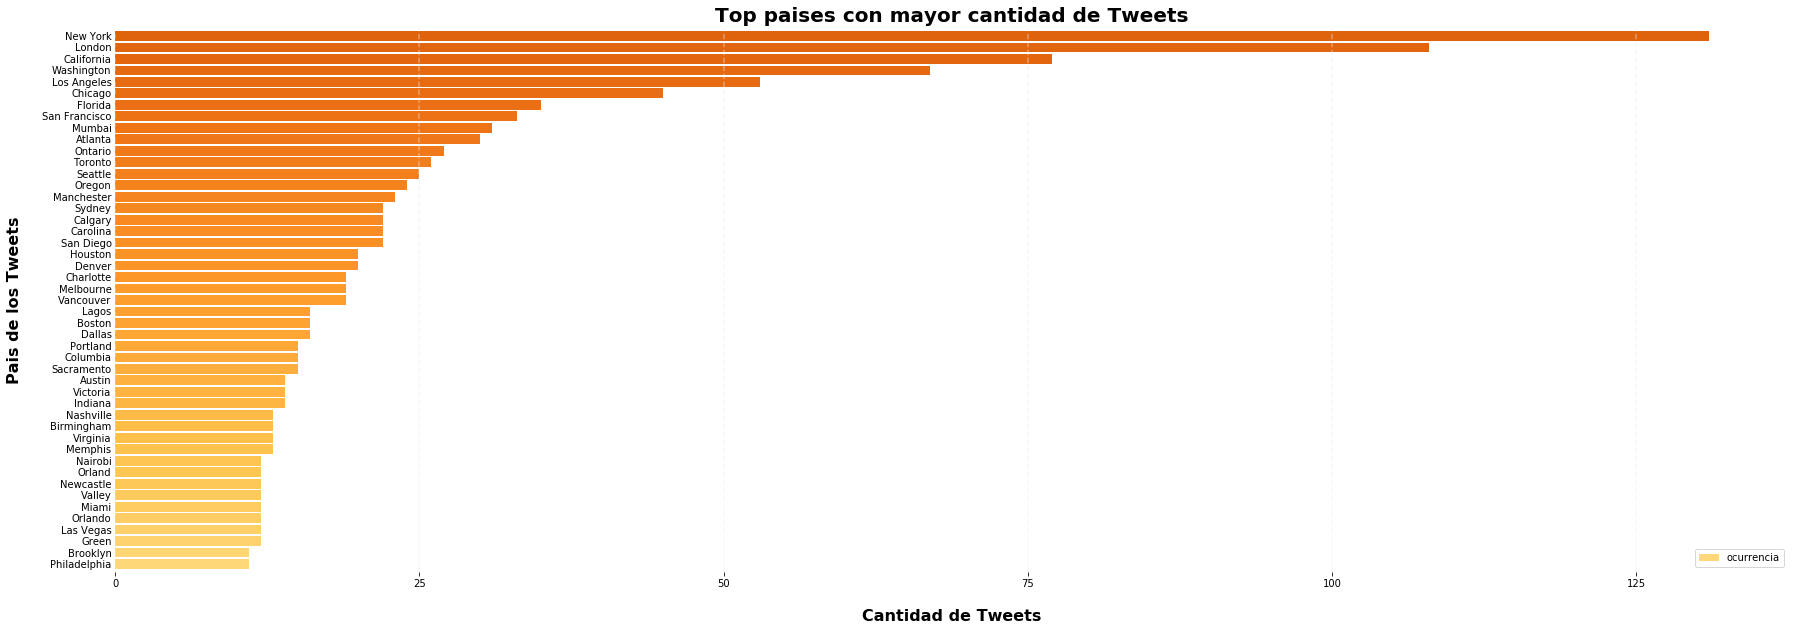

In [28]:
saltos = np.linspace(0.3, 0.7, 50)
colores = (cm.get_cmap('YlOrBr'))(saltos)
Top_populares = Top_populares.sort_values('ocurrencia')
Top_populares_plot = Top_populares.plot(kind='barh', y ='ocurrencia', x = 'city_ascii', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 150, 25.0))
plt.tick_params(axis='y', length=0)

Top_populares_plot.spines['right'].set_visible(False)
Top_populares_plot.spines['top'].set_visible(False)
Top_populares_plot.spines['left'].set_visible(False)
Top_populares_plot.spines['bottom'].set_visible(False)

lineas = Top_populares_plot.get_xticks()
for i in lineas:
      Top_populares_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
Top_populares_plot.set_xlabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_ylabel("Pais de los Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_title("Top paises con mayor cantidad de Tweets", weight='bold', size=20)

Text(0.5,1,'Top ciudades con mayor promedio de Tweets verdaderos')

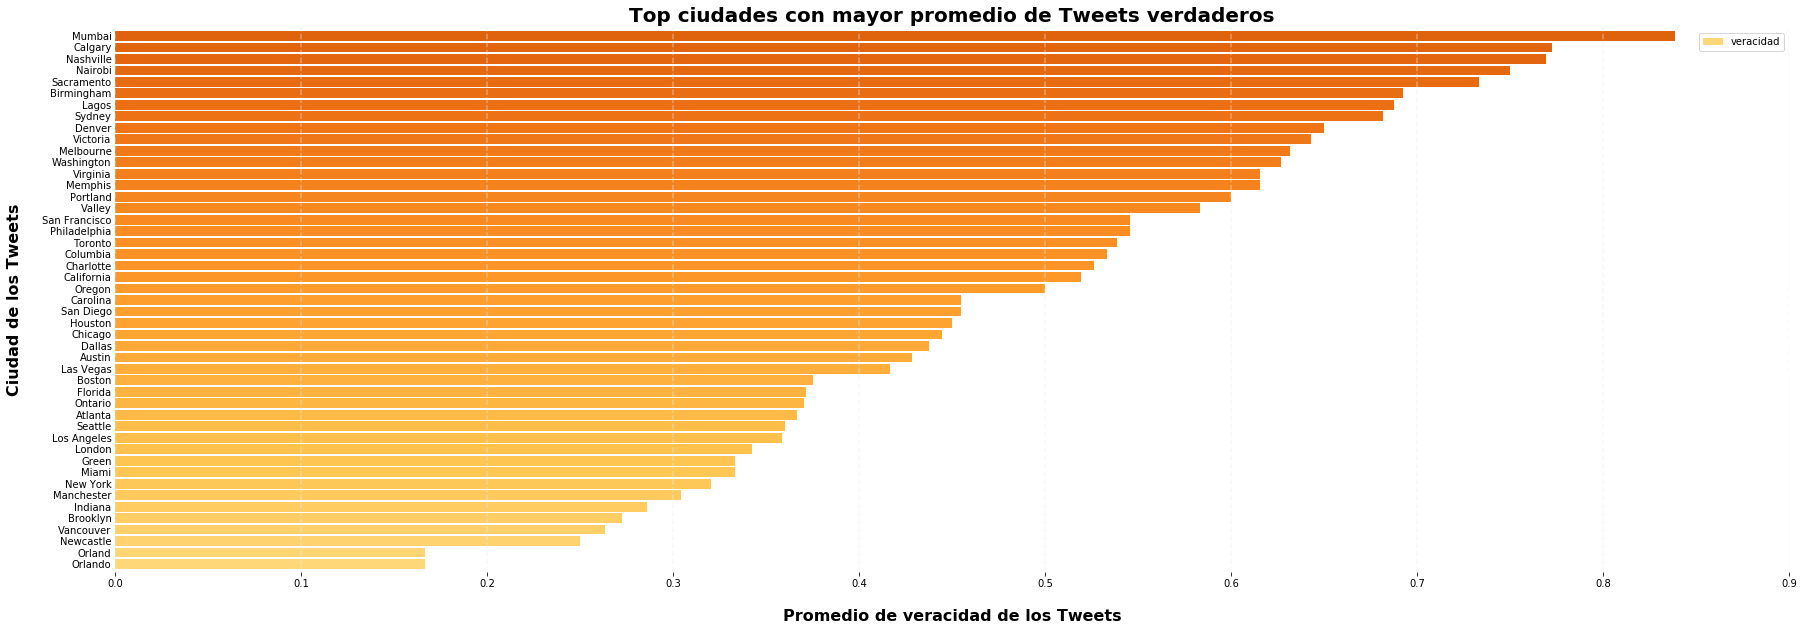

In [29]:
saltos = np.linspace(0.3, 0.7, 50)
colores = (cm.get_cmap('YlOrBr'))(saltos)
Top_populares = Top_populares.sort_values('veracidad')
Top_populares_plot = Top_populares.plot(kind='barh', y ='veracidad', x = 'city_ascii', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 1, 0.1))
plt.tick_params(axis='y', length=0)

Top_populares_plot.spines['right'].set_visible(False)
Top_populares_plot.spines['top'].set_visible(False)
Top_populares_plot.spines['left'].set_visible(False)
Top_populares_plot.spines['bottom'].set_visible(False)

lineas = Top_populares_plot.get_xticks()
for i in lineas:
      Top_populares_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
Top_populares_plot.set_xlabel("Promedio de veracidad de los Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_ylabel("Ciudad de los Tweets", labelpad=20, weight='bold', size=16)
Top_populares_plot.set_title("Top ciudades con mayor promedio de Tweets verdaderos", weight='bold', size=20)

In [30]:
ciudades_list['Pais'] = ciudades['country']

In [31]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais
0,Tokyo,8,0.500000,4,Japan
1,New York,131,0.320611,42,United States
2,Mexico City,1,0.000000,0,Mexico
3,Mumbai,31,0.838710,26,India
4,Sao Paulo,2,0.500000,1,Brazil
5,Delhi,10,0.600000,6,India
6,Shanghai,1,0.000000,0,China
7,Kolkata,3,0.333333,1,India
8,Los Angeles,53,0.358491,19,United States
9,Dhaka,2,1.000000,2,Bangladesh


In [32]:
ciudades_list = ciudades_list.drop_duplicates('city_ascii', keep = 'first')

In [33]:
ciudades_list.shape

(13482, 5)

In [34]:
Tweets_Paises = pd.DataFrame({'Cantidad_Tweets': 0, 'Pais': ciudades['country'], 'Veracidad': 0, 'Cantidad_Tweets_Verdaderos': 0})

In [35]:
Tweets_Paises['Veracidad'] = Tweets_Paises['Veracidad'].astype(float)

In [36]:
Tweets_Paises['Pais'].describe()

count             15493
unique              223
top       United States
freq               7328
Name: Pais, dtype: object

In [37]:
Tweets_Paises = Tweets_Paises.drop_duplicates(['Pais'])
Tweets_Paises = Tweets_Paises.reset_index(drop = True)

In [38]:
Tweets_Paises.dtypes

Cantidad_Tweets                 int64
Cantidad_Tweets_Verdaderos      int64
Pais                           object
Veracidad                     float64
dtype: object

In [39]:
ciudades_list.dtypes

city_ascii          object
ocurrencia           int64
veracidad          float64
cant_verdaderos      int64
Pais                object
dtype: object

In [40]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais
0,Tokyo,8,0.500000,4,Japan
1,New York,131,0.320611,42,United States
2,Mexico City,1,0.000000,0,Mexico
3,Mumbai,31,0.838710,26,India
4,Sao Paulo,2,0.500000,1,Brazil
5,Delhi,10,0.600000,6,India
6,Shanghai,1,0.000000,0,China
7,Kolkata,3,0.333333,1,India
8,Los Angeles,53,0.358491,19,United States
9,Dhaka,2,1.000000,2,Bangladesh


In [41]:
#CUIDADO AL EJECUTAR ESTO xD
for w in range(Tweets_Paises['Pais'].count()):
    
    pais = Tweets_Paises.loc[w, 'Pais']
    
    la_ciudad_es_del_pais = ciudades_list.loc[:, 'Pais'].str.contains(pais , regex = False)
    
    ciudades_del_pais = ciudades_list.loc[la_ciudad_es_del_pais]
    
    total_tweets_pais = ciudades_del_pais['ocurrencia'].sum()

    total_tweets_verdaderos_pais = ciudades_del_pais['cant_verdaderos'].sum()
    
    Tweets_Paises.loc[w, 'Cantidad_Tweets'] = total_tweets_pais
    
    Tweets_Paises.loc[w, 'Cantidad_Tweets_Verdaderos'] = total_tweets_verdaderos_pais
    
    if (total_tweets_pais != 0):
        
        Tweets_Paises.loc[w, 'Veracidad'] = float(total_tweets_verdaderos_pais)/float(total_tweets_pais)

In [42]:
Tweets_Paises

,Cantidad_Tweets,Cantidad_Tweets_Verdaderos,Pais,Veracidad
0,13,7,Japan,0.538462
1,1906,839,United States,0.440189
2,8,4,Mexico,0.500000
3,75,52,India,0.693333
4,16,5,Brazil,0.312500
5,3,1,China,0.333333
6,2,2,Bangladesh,1.000000
7,8,3,Argentina,0.375000
8,14,12,Pakistan,0.857143
9,6,4,Egypt,0.666667


In [43]:
Tweets_Paises['Cantidad_Tweets'].sum()

2970

In [44]:
paises_mas_10_tweets = (Tweets_Paises.loc[:,'Cantidad_Tweets'] > 10)

In [45]:
paises_mas_10_tweets = Tweets_Paises.loc[paises_mas_10_tweets]

Text(0.5,1,'Top paises con mayor cantidad de Tweets')

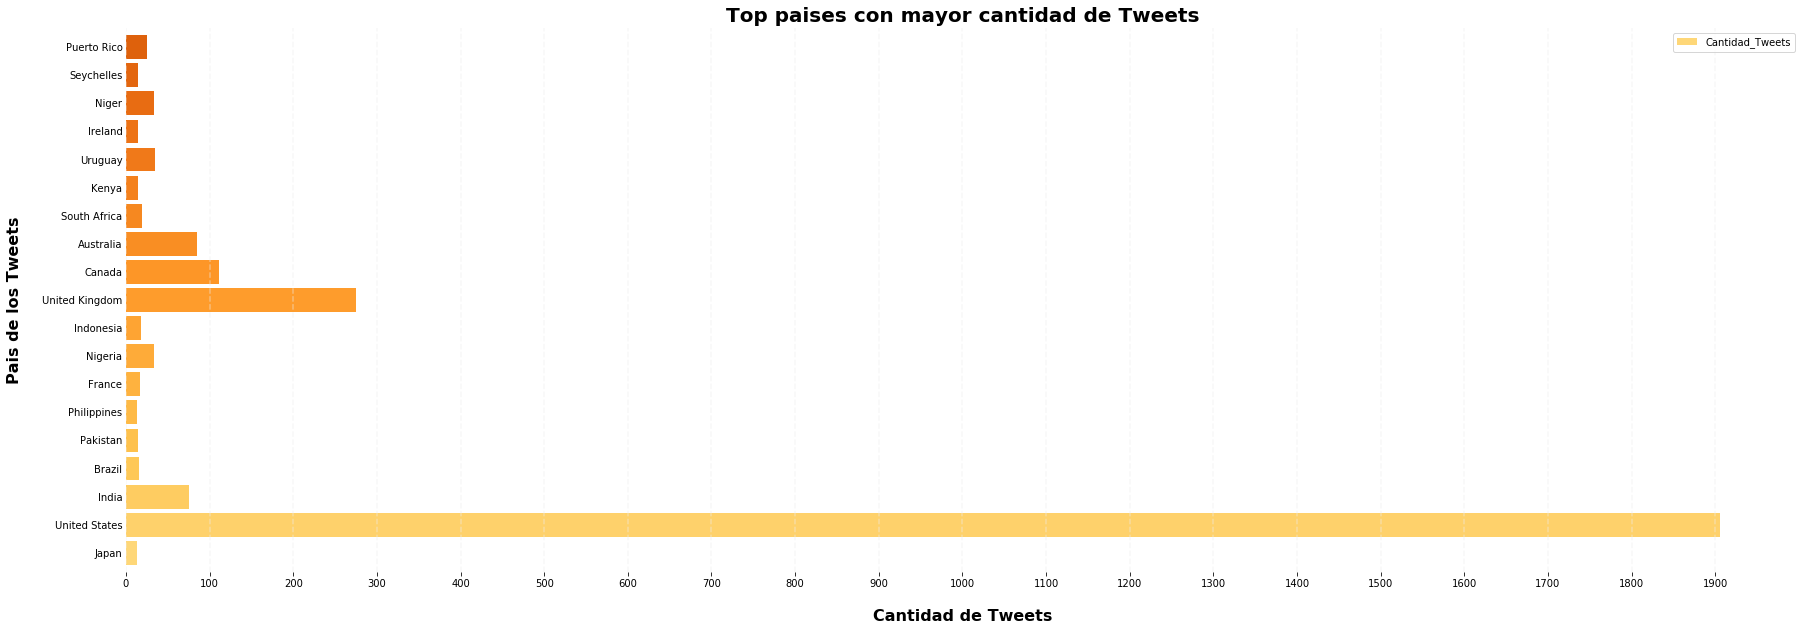

In [46]:
saltos = np.linspace(0.3, 0.7, 20)
colores = (cm.get_cmap('YlOrBr'))(saltos)

paises_mas_10_tweets_plot = paises_mas_10_tweets.plot(kind='barh', y ='Cantidad_Tweets', x = 'Pais', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 2000, 100.0))
plt.tick_params(axis='y', length=0)

paises_mas_10_tweets_plot.spines['right'].set_visible(False)
paises_mas_10_tweets_plot.spines['top'].set_visible(False)
paises_mas_10_tweets_plot.spines['left'].set_visible(False)
paises_mas_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = paises_mas_10_tweets_plot.get_xticks()
for i in lineas:
      paises_mas_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
paises_mas_10_tweets_plot.set_xlabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_ylabel("Pais de los Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_title("Top paises con mayor cantidad de Tweets", weight='bold', size=20)

Text(0.5,1,'Top paises con mayor promedio de Tweets verdaderos')

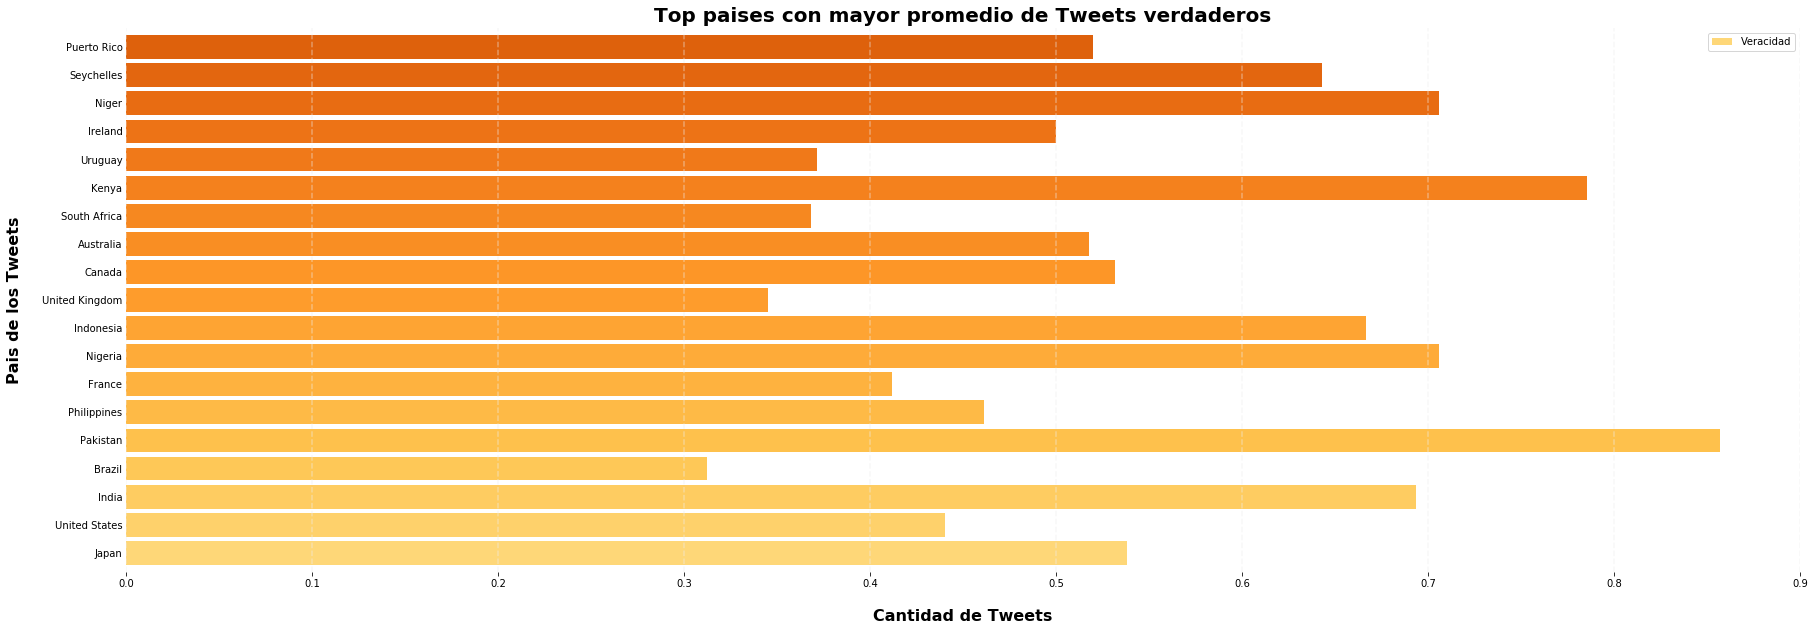

In [47]:
saltos = np.linspace(0.3, 0.7, 20)
colores = (cm.get_cmap('YlOrBr'))(saltos)

paises_mas_10_tweets_plot = paises_mas_10_tweets.plot(kind='barh', y ='Veracidad', x = 'Pais', figsize=(30,10), color=colores, width=0.85)

plt.xticks(np.arange(0, 1, 0.1))
plt.tick_params(axis='y', length=0)

paises_mas_10_tweets_plot.spines['right'].set_visible(False)
paises_mas_10_tweets_plot.spines['top'].set_visible(False)
paises_mas_10_tweets_plot.spines['left'].set_visible(False)
paises_mas_10_tweets_plot.spines['bottom'].set_visible(False)

lineas = paises_mas_10_tweets_plot.get_xticks()
for i in lineas:
      paises_mas_10_tweets_plot.axvline(x=i, linestyle='--', alpha=0.4, color='#eeeeee')
        
paises_mas_10_tweets_plot.set_xlabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_ylabel("Pais de los Tweets", labelpad=20, weight='bold', size=16)
paises_mas_10_tweets_plot.set_title("Top paises con mayor promedio de Tweets verdaderos", weight='bold', size=20)

Veracidad de los tweets cuando la locacion es "valida"

In [48]:
Tweets_Paises['Cantidad_Tweets'].sum()

2970

In [49]:
Tweets_Paises['Cantidad_Tweets_Verdaderos'].sum()

1359

In [50]:
float(Tweets_Paises['Cantidad_Tweets_Verdaderos'].sum())/float(Tweets_Paises['Cantidad_Tweets'].sum())

0.4575757575757576

------------------------------------------------------------------------------------------------------------------

In [51]:
Tweets_Verdaderos_Locations_Invalidas = (tweets['target'].sum() - Tweets_Paises['Cantidad_Tweets_Verdaderos'].sum())

In [52]:
Tweets_Verdaderos_Locations_Invalidas

1912

In [53]:
Tweets_Totales_Locations_Invalidas = (tweets['id'].count() - Tweets_Paises['Cantidad_Tweets'].sum())

In [54]:
Tweets_Totales_Locations_Invalidas

4643

In [55]:
float(Tweets_Verdaderos_Locations_Invalidas)/float(Tweets_Totales_Locations_Invalidas)

0.4118027137626535

Cuando la location es invalida hay una ligera diferencia entre la veracidad de los Tweets

In [56]:
ciudades_list = ciudades_list.reset_index(drop = True)

In [57]:
ciudades = ciudades.drop_duplicates('city_ascii', keep = 'first')

In [58]:
ciudades = ciudades.reset_index(drop = True) # A ciudades_list ya le habia hecho el drop_duplicates antes.

In [59]:
ciudades_list['cant_habitantes'] = ciudades['population']

In [60]:
ciudades_list

,city_ascii,ocurrencia,veracidad,cant_verdaderos,Pais,cant_habitantes
0,Tokyo,8,0.500000,4,Japan,35676000.0
1,New York,131,0.320611,42,United States,19354922.0
2,Mexico City,1,0.000000,0,Mexico,19028000.0
3,Mumbai,31,0.838710,26,India,18978000.0
4,Sao Paulo,2,0.500000,1,Brazil,18845000.0
5,Delhi,10,0.600000,6,India,15926000.0
6,Shanghai,1,0.000000,0,China,14987000.0
7,Kolkata,3,0.333333,1,India,14787000.0
8,Los Angeles,53,0.358491,19,United States,12815475.0
9,Dhaka,2,1.000000,2,Bangladesh,12797394.0


In [71]:
Ciudades_Mas_De_10_Tweets = (ciudades_list.loc[:,'ocurrencia'] > 5)

Text(0.5,1,'Cantidad de habitantes Vs. Veracidad')

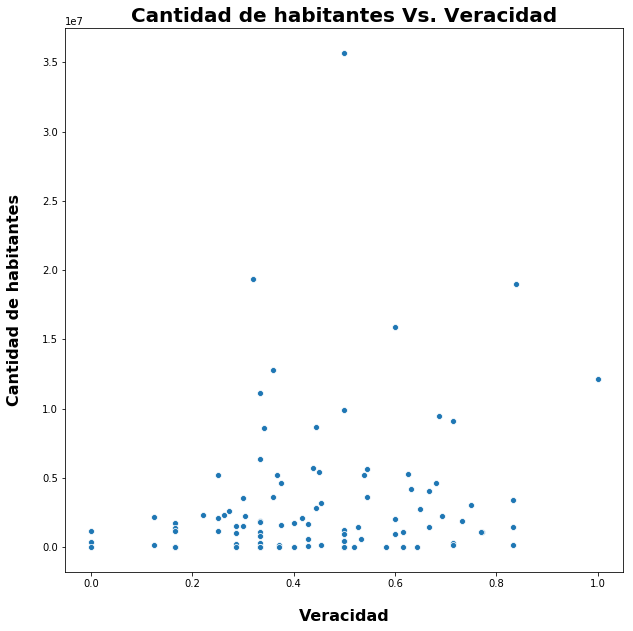

In [75]:
fig, ax= plt.subplots(figsize = (10, 10))
Plot = sns.scatterplot(x = "veracidad", y = "cant_habitantes", data = ciudades_list.loc[Ciudades_Mas_De_10_Tweets], ax = ax)

Plot.set_xlabel("Veracidad", labelpad=20, weight='bold', size=16)
Plot.set_ylabel("Cantidad de habitantes", labelpad=20, weight='bold', size=16)
Plot.set_title("Cantidad de habitantes Vs. Veracidad", weight='bold', size=20)


Text(0.5,1,'Cantidad de Tweets Vs. Veracidad (Por ciudad)')

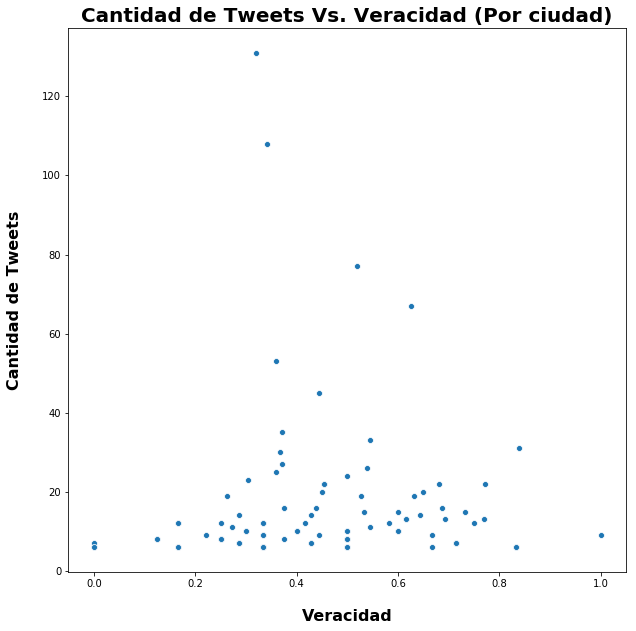

In [76]:
fig, ax= plt.subplots(figsize = (10, 10))
Plot = sns.scatterplot(x = "veracidad", y = "ocurrencia", data = ciudades_list.loc[Ciudades_Mas_De_10_Tweets], ax = ax)

Plot.set_xlabel("Veracidad", labelpad=20, weight='bold', size=16)
Plot.set_ylabel("Cantidad de Tweets", labelpad=20, weight='bold', size=16)
Plot.set_title("Cantidad de Tweets Vs. Veracidad (Por ciudad)", weight='bold', size=20)

In [121]:
# prepare some data
x = ciudades_list.loc[Ciudades_Mas_De_10_Tweets]['veracidad']
y = ciudades_list.loc[Ciudades_Mas_De_10_Tweets]['ocurrencia']
radii = np.sqrt(ciudades_list.loc[Ciudades_Mas_De_10_Tweets]['cant_habitantes'])/10e4
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 1500) for r, g in zip(50+10*x, 30+10*y)
]

# output to static HTML file (with CDN resources)
output_file("color_scatter.html", title="color_scatter.py example", mode="cdn")

TOOLS = "crosshair,pan,wheel_zoom,box_zoom,reset,box_select,lasso_select"

# create a new plot with the tools above, and explicit ranges
p = figure(tools=TOOLS, x_range=(0, 1), y_range=(0, 150), width=1000, height=1000)

# add a circle renderer with vectorized colors and sizes
p.circle(x, y, radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

# show the results
show(p)